This is a sample dataset which tracks a fictional telco company's customer churn based on a variety of possible factors. I got it from this URL https://community.ibm.com/accelerators/catalog/content/Customer-churn. 
The Churn column indicates whether or not the customer left within the last month. Other columns include tensure, personal information, the charging information, and the services each customer has. 
Our target will be prediction of Churn rate.

# Retrieve data

In [1]:
import os
import numpy as np
import pandas as pd
filepath = "data/CustomerChurn.csv"
df_raw = pd.read_csv(filepath)
df_raw.head()

,LoyaltyID,CustomerID,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Brief description of the data set and a summary of its attributes

In [2]:
# number of rows and number of columns
df_raw.shape

(7043, 21)

In [3]:
# check data type of each column
df_raw.dtypes

LoyaltyID             int64
CustomerID           object
SeniorCitizen        object
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LoyaltyID         7043 non-null   int64  
 1   CustomerID        7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
LoyaltyID,7043.0,550382.651001,260776.118690,100346.00,323604.5,548704.00,776869.00,999912.00
Tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
df_raw.describe(include='object').T

,count,unique,top,freq
CustomerID,7043,7043,7590-VHVEG,1
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


# Clean Data and Feature Engineering
Actions to be taken include:
- Spot and fix any missing values
- Understand the attributes of the variables
- Fix wrong datatypes
- Check for duplicates
- Check outliers
- Remove the volume that I'm not using
- We may apply LabelEncoder or One Hot Encoder to categorical features to add dummies variables into the dataset. However, we won't perform such preprocessing until the time when we want to visulize the categorical features in EDA phase.

In [7]:
df=df_raw.copy()

In [8]:
# Check duplicated data
df.duplicated().sum()

0

In [9]:
# Replace blank with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [10]:
# Check missing value
df.isnull().sum()

LoyaltyID            0
CustomerID           0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df[df['TotalCharges'].isnull()]

,LoyaltyID,CustomerID,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,344543,4472-LVYGI,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,150036,3115-CZMZD,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,497688,5709-LVOEQ,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,158969,4367-NUYAO,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,470044,1371-DWPAZ,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,937662,7644-OMVMY,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,821083,3213-VVOLG,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,947028,2520-SGTTA,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,135257,2923-ARZLG,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,317862,4075-WKNIU,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The null value in TotalCharges is due to the Tenure is 0. There are only 11 missing values vs. 7043 total numbers of records. It does not worth filling the values with the mean, meadian, or any other methods. Therefore, I am going to simply drop those missing values in column TotalCharges.

In [12]:
# Drop NaN values
df=df.dropna() 

In [13]:
df.isnull().sum()

LoyaltyID           0
CustomerID          0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.shape

(7032, 21)

In [15]:
# Converet data type from object to float for the column TotalCharges
df['TotalCharges']=df['TotalCharges'].astype(float)
df.dtypes

LoyaltyID             int64
CustomerID           object
SeniorCitizen        object
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
# Drop columns LoyaltyID and CustomerID
df.drop(['LoyaltyID', 'CustomerID'], axis = 1, inplace = True)
df.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
stats_df = df.describe()
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,Tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
median,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000
range,71.000000,100.500000,8666.000000


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

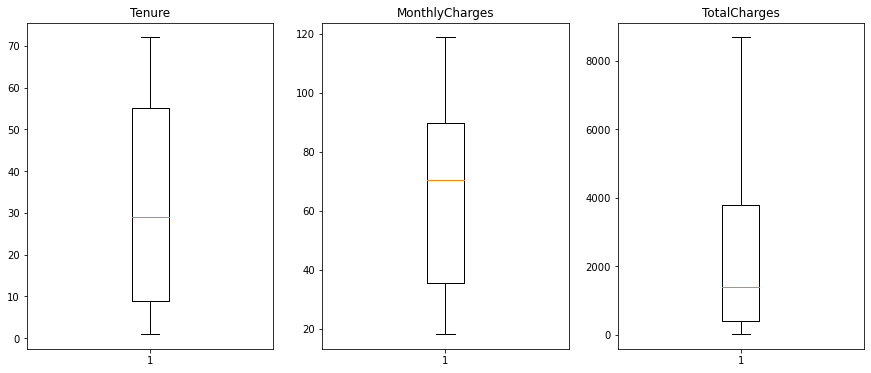

In [19]:
#check outliers of numberic variables using boxplot
col = df.columns
col_num = [col for col in col if df[col].dtype != object]
ig, ax = plt.subplots(1,3, figsize=(15, 6))

for i, col in enumerate(col_num):
    ax[i].boxplot(df[col]) 
    ax[i].set_title(col)

Tenure is positively skewed as mean is greater than median
MonthlyCharges is negatively skewed as mean is lower than median
TotalCharges is positively skewed as mean is greater than median 
But it doesn't seem to me that there is any outlier. 

In [20]:
import seaborn as sns
sns.set_context('notebook')

In [21]:
# Preprocess categorical features
df.describe(include='object')

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Values like "No internet service", "No phone service" should be equal to "NO".

In [22]:
df.replace("No phone service","No",inplace=True)
df.replace("No internet service","No",inplace=True)

# EDA
Plan for EDA:
Objectives: we'll try to analyze the data and spot if there's a pattern on why customers leave the company. The plan is:
- Group the features into 4 types:
    - Numeric features (they are numeric account type of features)
         - ['Tenure', 'MonthlyCharges', 'TotalCharges']
    - Demographic features (they are categorical account type of features)
        - ['SeniorCitizen',"Partner",'Dependents']
    - Services features
      - ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','DeviceProtection']

    - Account features
         -  ['Contract','PaperlessBilling','PaymentMethod']
- Plot scater plot for all numeric features
- Plot countplot for all categorical features
- Add dummies variables for categorical features so that they can be used for visualization of correlation between all features.
- Visualize the correlationshipp between all features by heatmap

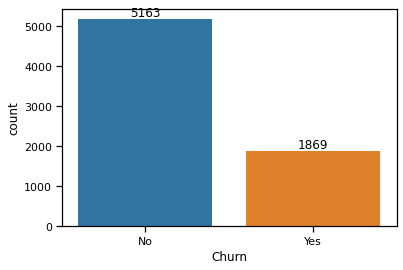

In [23]:
fig_churn = sns.countplot(x="Churn",data=df)
fig_churn.bar_label(fig_churn.containers[0])
plt.show()

#### Key findings: 
The count of Churn customers looks is much less than non Churn customers. In total, there are 1869 Chrun customers.

### <span style="color:blue">How numeric features affect Churn?</span>
['Tenure', 'MonthlyCharges', 'TotalCharges']

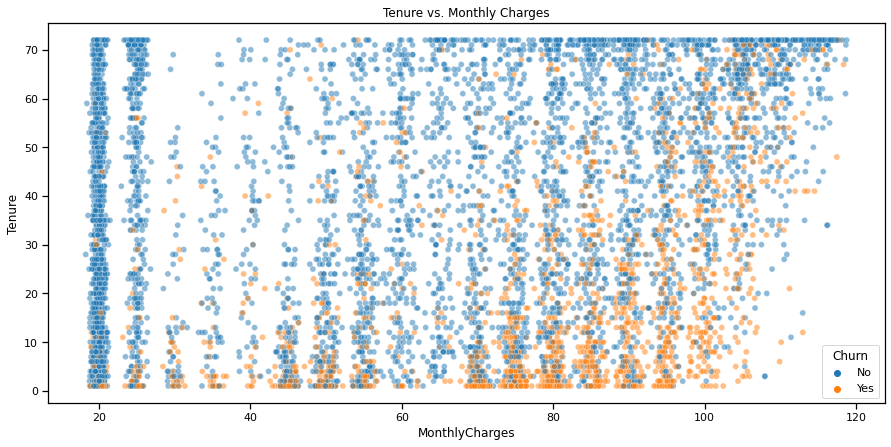

In [24]:
f, ax = plt.subplots(figsize=(15, 7))
fig_churn_tenure_monthlycharges = sns.scatterplot(x="MonthlyCharges",y="Tenure",hue="Churn",alpha=0.5,data=df)
fig_churn_tenure_monthlycharges.set_title("Tenure vs. Monthly Charges")
plt.show()

#### Key findings:
Most of the Churn customers are on the right side and rather closer to the bottom (shorter Tenure). This indicates that the rather newer customers but with higher monthly charges might more eager to churn. 
I should probably use MonthlyCharges and Tenure as features for my Churn rate prediction model, because it seems they affect the target Churn feature.

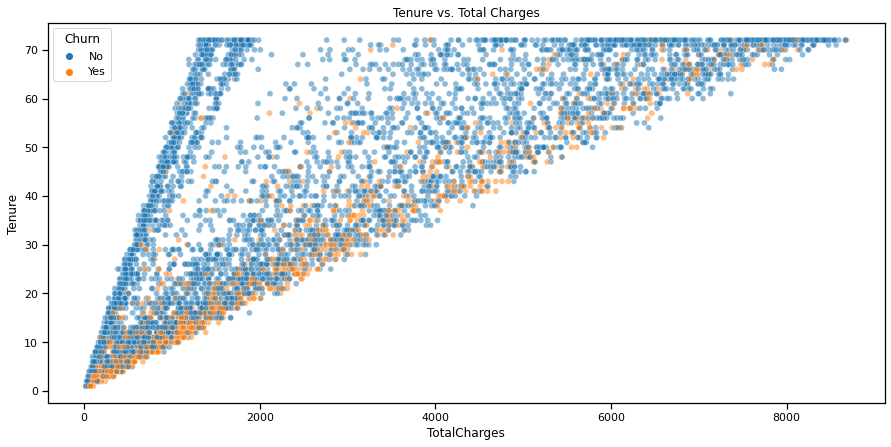

In [25]:
f, ax = plt.subplots(figsize=(15, 7))
fig_churn_tenure_monthlycharges = sns.scatterplot(x="TotalCharges",y="Tenure",hue="Churn",alpha=0.5,data=df)
fig_churn_tenure_monthlycharges.set_title("Tenure vs. Total Charges")
plt.show()

#### Key findings
It looks to me that the blue points (No Churn) are most densely on the left side (lower Total Charges) and we see when the No Churn customers stay longer, they don't have large increase in Total Charges. Most of the Churn customers are on the bottom. That means Churn Customers just joined recenlty. 
This indicates Totcal Charges and Tensure are features affect the target feature Churn and they should be used in my Churn prediction model..

### <span style="color:blue">How demographic features affect Churn?</span>
['SeniorCitizen',"Partner",'Dependents']

In [26]:
def draw_features(col,data,total):
    ax=sns.countplot(x=col, hue='Churn', data=data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
        plt.xticks(rotation=45)

In [27]:
df_demographic=df[['SeniorCitizen',"Partner",'Dependents', 'Churn']]
df_demographic.head()

,SeniorCitizen,Partner,Dependents,Churn
0,No,Yes,No,No
1,No,No,No,No
2,No,No,No,Yes
3,No,No,No,No
4,No,No,No,Yes


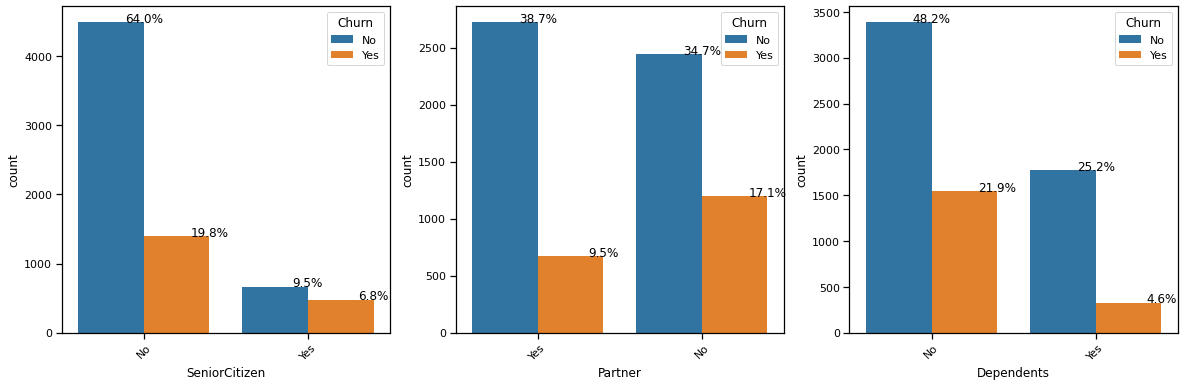

In [28]:
cols_demographic = ['SeniorCitizen',"Partner",'Dependents']
total=float(len(df_demographic))
plt.figure(figsize=(20,6))
for i in enumerate(cols_demographic):
    plt.subplot(1,3,i[0]+1)
    draw_features(i[1],df_demographic,total)

#### Key findings for demographic features:
1. The first chart shows how the seniority affects customer Churn or No Churn. 
  - The majority of the customers are non senior and No Churn.
  - The senior customers are more likely to Churn, but the Churn for senior customers is just a bit higher than No Churn.
  - The following calulation shows consistent results:
      - The percent of Churns vs. NoChurn in the group of non senior customers is 23.65 vs 73.35. 
      - But in the group of senior customers, the Churn vs. NoChurn is 41.68 vs. 58.32 which is not that signifcant.


2. The second chart shows when customers are not married (have No Partner) could be more likely to Churn.


3. The third chart show when customers who are living without dependents could be more likely to Churn.


4. There may be likely the Correlation between Partner and Dependents these 2 features.

### <span style="color:blue">How service features affect Churn?</span>
services ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','DeviceProtection']

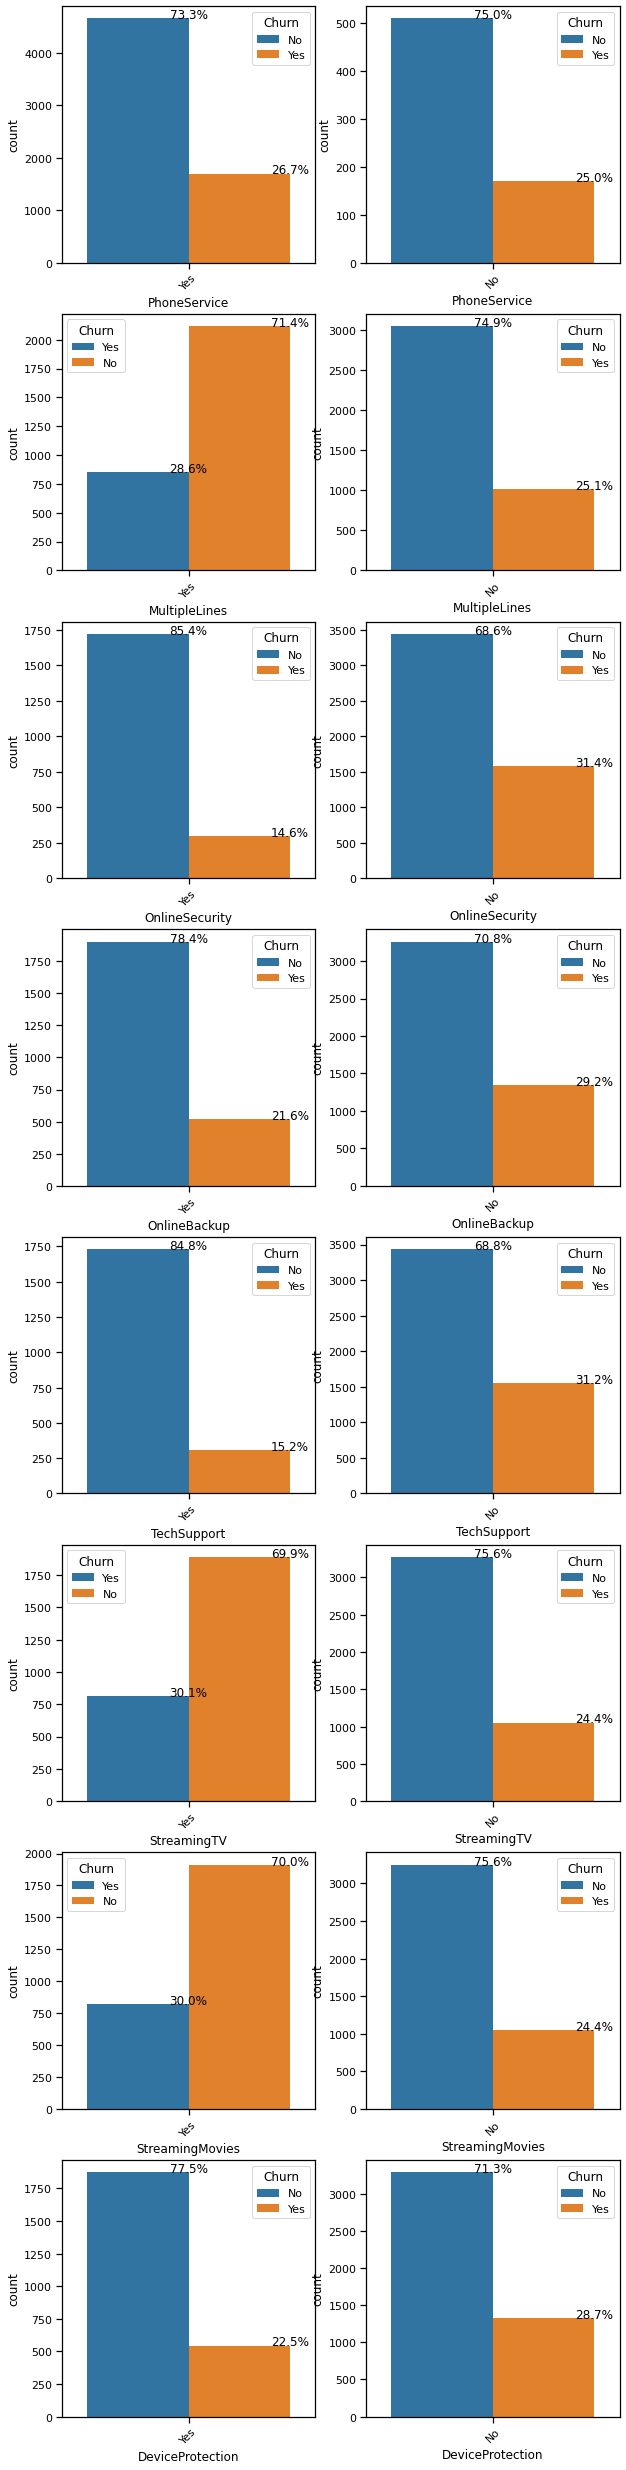

In [29]:
plt.figure(figsize=(10,50))
cols_services=['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','StreamingMovies','DeviceProtection']

c=0
for i in enumerate(cols_services):
    col=i[1]
    data_yes=df[df[col]=='Yes']
    data_no=df[df[col]=='No']
    total_yes=float(len(data_yes))
    total_no=float(len(data_no))
    c=c+1
    plt.subplot(9,2,c)
    c=c+1
    draw_features(col,data_yes,total_yes)
    plt.subplot(9,2,c)
    draw_features(col,data_no,total_no)

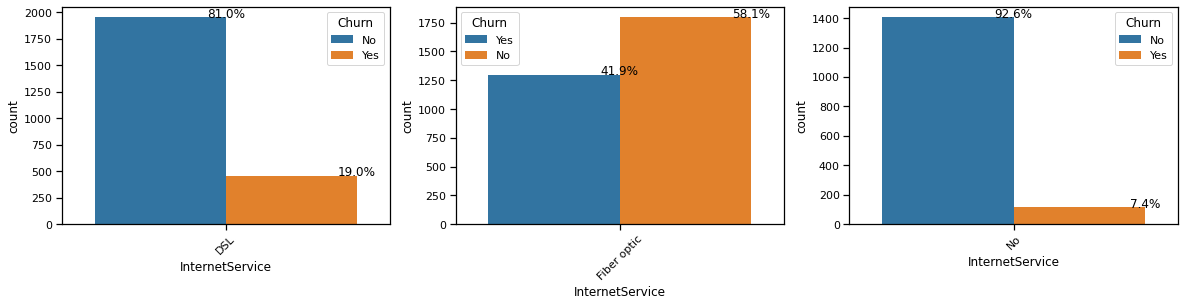

In [30]:
plt.figure(figsize=(20,4))

data_dsl=df[df['InternetService']=='DSL']
data_no=df[df['InternetService']=='No']
data_fiber=df[df['InternetService']=='Fiber optic']
total_dsl=float(len(data_dsl))
total_fiber=float(len(data_fiber))
total_no=float(len(data_no))

plt.subplot(1,3,1)
draw_features('InternetService',data_dsl,total_dsl)
plt.subplot(1,3,2)
draw_features('InternetService',data_fiber,total_fiber)
plt.subplot(1,3,3)
draw_features('InternetService',data_no,total_no)

#### Key findings for services features:

-For these categorical service features, there is no signifant difference in the churn rate between customers with these services, or without these services, except for OnlineSercurity and TechSupport services. The following shows a comparison of the Churn rate between customers with services vs. without services:
- PhoneServices-Yes Churn vs. PhoneServices-No Churn: 26.7% vs. 25%
- MultipleLines-Yes Churn vs. MultipleLines-No Churn: 28.6% vs. 25.1%
- <span style="color:blue">OnlineSecurity-Yes Churn vs. OnlineSecurity-No Churn: 14.6% vs. 31.4%</span>
- OnlineBackup-Yes Churn vs. OnlineBackup-No Churn: 21.6% vs. 29.2%
- <span style="color:blue">TechSupport-Yes Churn vs. TechSupport-No Churn: 15.2% vs. 31.2%</span>
- StreamingTV-Yes Churn vs. StreamingTV-No Churn: 30.1% vs. 24.4%
- StreamingMovies-Yes Churn vs. StreamingMovies-No Churn: 30% vs. 24.4%
- DeviceProtection-Yes Churn vs. DeviceProtection-No Churn: 22.5% vs. 28.7%

The customers with Fiber optic of internet service is more likely to Churn:
- <span style="color:blue">InternetService-DSL Churn vs. InternetService-Fiber vs. InternetService-No: 19.% vs. 41.9% vs. 7.4%</span>

### <span style="color:blue">How account features affect Churn?</span>
account features ['Contract','PaperlessBilling','PaymentMethod']

In [31]:
df_account=df[['Contract','PaperlessBilling','PaymentMethod','Churn']]
cols_account= ['Contract','PaperlessBilling','PaymentMethod']
df_account.describe()

,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032
unique,3,2,4,2
top,Month-to-month,Yes,Electronic check,No
freq,3875,4168,2365,5163


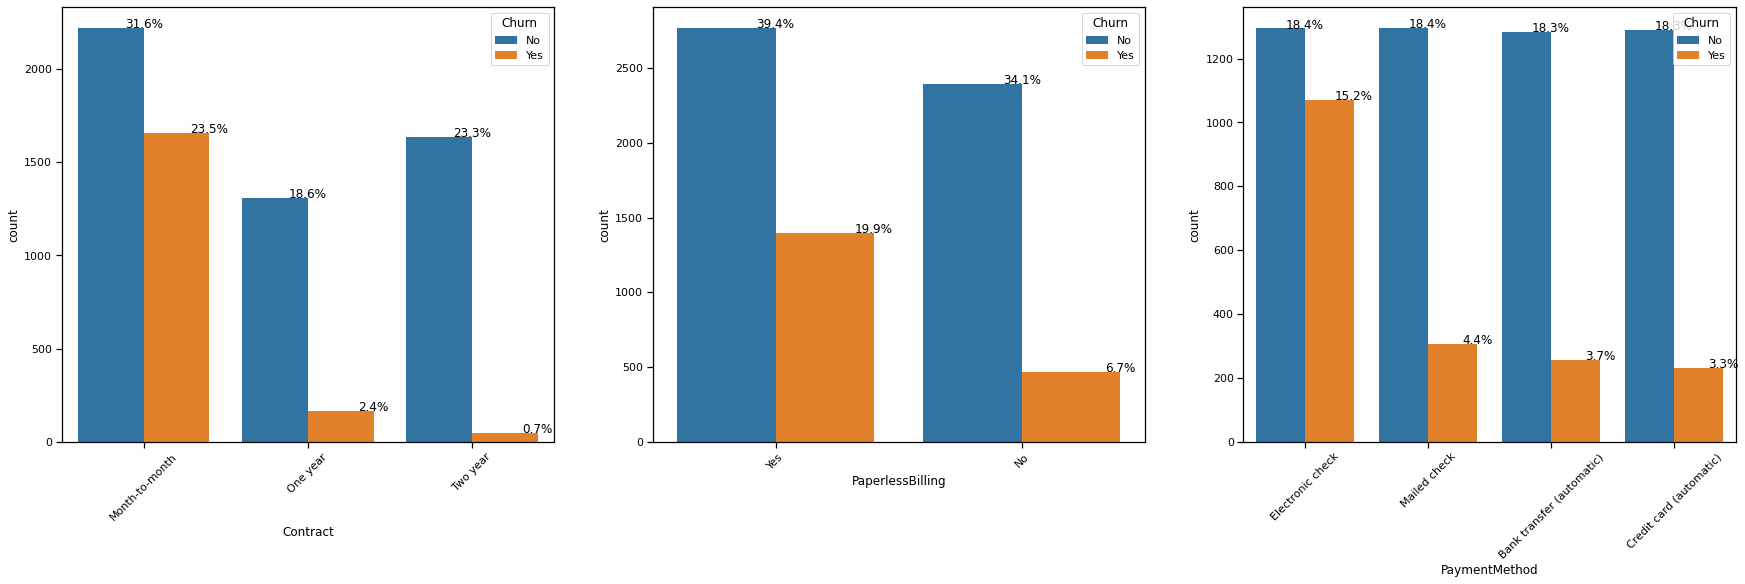

In [32]:
total=float(len(df_account))
plt.figure(figsize=(30,8))
for i in enumerate(cols_account):
    plt.subplot(1,3,i[0]+1)
    draw_features(i[1],df_account,total)

#### Key findings for account features:

For these account features, we can see they have more significant impact to customers to churn. Customers are more likely to churn when they pay by <span style="color:blue">Month-to-Month type of Contract, PaperlessBilling, and Electronic Check</span>.

### <span style="color:blue">Visualize the correlation among all features</span>

In [33]:
# Apply One Hot Encoder to convert categorical variables to dummies
# col = df.columns
# col_cat = [col for col in col if df[col].dtype == object]
# df_dummies = pd.get_dummies(df, columns=col_cat)
# df_dummies = pd.get_dummies(df, columns=col_cat, drop_first=True)
# corr = df_labeled.corr(method='pearson')
# corr

In [34]:
# Convert categorical variable to be numeric with LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
col = df.columns
col_cat = [col for col in col if df[col].dtype == object]
df_labeled=df.copy()
for label in col_cat:
    new_column_name = f"{label}_Labeled"
    df_labeled[new_column_name] = lb.fit_transform(df_labeled[label])
df_labeled.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,OnlineSecurity_Labeled,OnlineBackup_Labeled,DeviceProtection_Labeled,TechSupport_Labeled,StreamingTV_Labeled,StreamingMovies_Labeled,Contract_Labeled,PaperlessBilling_Labeled,PaymentMethod_Labeled,Churn_Labeled
0,No,Yes,No,1,No,No,DSL,No,Yes,No,...,0,1,0,0,0,0,0,1,2,0
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,...,1,0,1,0,0,0,1,0,3,0
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,...,1,1,0,0,0,0,0,1,3,1
3,No,No,No,45,No,No,DSL,Yes,No,Yes,...,1,0,1,1,0,0,1,0,0,0
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,...,0,0,0,0,0,0,0,1,2,1


In [35]:
# Look at correlation
corr = df_labeled.corr(method='pearson')
corr

,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen_Labeled,Partner_Labeled,Dependents_Labeled,PhoneService_Labeled,MultipleLines_Labeled,InternetService_Labeled,OnlineSecurity_Labeled,OnlineBackup_Labeled,DeviceProtection_Labeled,TechSupport_Labeled,StreamingTV_Labeled,StreamingMovies_Labeled,Contract_Labeled,PaperlessBilling_Labeled,PaymentMethod_Labeled,Churn_Labeled
Tenure,1.000000,0.246862,0.825880,0.015683,0.381912,0.163386,0.007877,0.332399,-0.029835,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,-0.370087,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,0.219874,0.097825,-0.112343,0.248033,0.490912,-0.322173,0.296447,0.441529,0.482607,0.338301,0.629668,0.627235,-0.072739,0.351930,-0.192500,0.192858
TotalCharges,0.825880,0.651065,1.000000,0.102411,0.319072,0.064653,0.113008,0.469042,-0.175691,0.412619,0.510100,0.522881,0.432868,0.515709,0.519867,0.450306,0.157830,-0.330594,-0.199484
SeniorCitizen_Labeled,0.015683,0.219874,0.102411,1.000000,0.016957,-0.210550,0.008392,0.142996,-0.032160,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,-0.038158,0.150541
Partner_Labeled,0.381912,0.097825,0.319072,0.016957,1.000000,0.452269,0.018397,0.142561,0.000513,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,-0.156232,-0.149982
Dependents_Labeled,0.163386,-0.112343,0.064653,-0.210550,0.452269,1.000000,-0.001078,-0.024307,0.044030,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,-0.041989,-0.163128
PhoneService_Labeled,0.007877,0.248033,0.113008,0.008392,0.018397,-0.001078,1.000000,0.279530,0.387266,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,-0.005499,0.011691
MultipleLines_Labeled,0.332399,0.490912,0.469042,0.142996,0.142561,-0.024307,0.279530,1.000000,0.011346,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,-0.171240,0.040033
InternetService_Labeled,-0.029835,-0.322173,-0.175691,-0.032160,0.000513,0.044030,0.387266,0.011346,1.000000,-0.392174,-0.313708,-0.305757,-0.388535,-0.241330,-0.250144,0.099579,-0.138166,0.084504,-0.047097
OnlineSecurity_Labeled,0.328297,0.296447,0.412619,-0.038576,0.143346,0.080786,-0.091676,0.098592,-0.392174,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,-0.149112,-0.171270


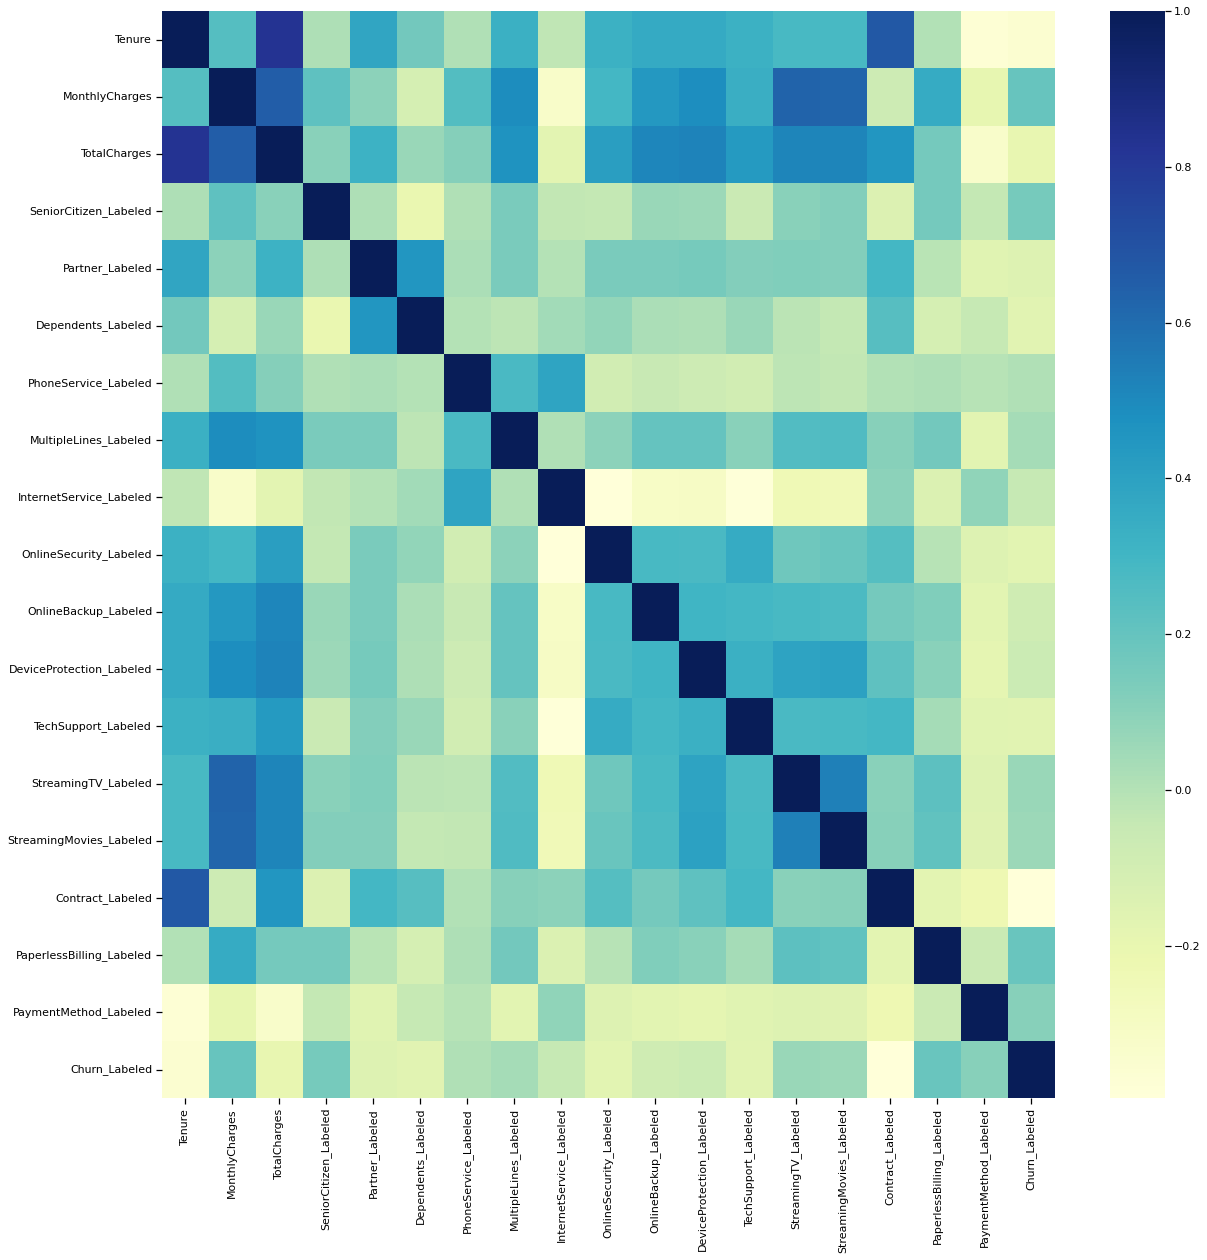

In [36]:
# Heatmap Correlation
f, ax = plt.subplots(figsize=(20,20))
fig_corr = sns.heatmap(corr,cmap="YlGnBu")
plt.show()

#### Key findings for feature correlation:
- There is strong correlation between TotalCharges and Tenure, also strong correlation between MonthlyCharges and TotalCharges.

- MonthlyCharges also has strong correlation with StreamingMovies and StreamingTV. This is probably because these services are paid services.

- StreamingTV has a Correlation with StreamingMovies. This could mean that Customers with StreamingTV service are most likely to purchase StreamingMovies also.

- Partner and Dependent these two features also show strong correlation. I'm guessing married customers may more likely have dependents.

- Tenure and Contract also shows strong correlation. I'm guessing customers with longer time of contract may have longer tenure.

# Formulate 3 Hypothesis About The Data

### <span style="color:blue">Hypothesis 1:</span>

Being senior increases the chances of the customers to churn.

$H_{0}$: There is no difference in the churn rate according to the seniority of the customers. 

$H_{A}$: If the customer is senior, it is more likely that he will churn.

### <span style="color:blue">Hypothesis 2:</span>

Types of contract has impact on churn rate. Customers with two-years contract have lower chance to churn.

$H_{0}$: There is no difference in the churn rate according to the contract types of the customers. 
$H_{A}$: Customers with two-years contract are less likely to churn.

### <span style="color:blue">Hypothesis 1:</span>

Customers who pay the cost by Electronic Check are more likely to churn.

$H_{0}$: The customers who paid the cost by Electronic Check are more likely to churn.

$H_{A}$: There is no difference in the churn rate according to the payment types of the passengers. 

# Test Hypothesis :

If the null hypothesis is correct, the test statistic is binomial distributed with parameters n = 30 and p = 0.5. That is, if we repeated the whole experiment many times, we would see such a distribution for all the results.

Null: I'm not special; my true rate of the comming senior customer's to churn is 0.5.

But even under this hypothesis, I got  [15, 18, 21] respectively out of 30 right. So did I get lucky (by random chance) or am I mystical?

Alternative: My true rate of the comming senior customer's churn prediction is greater than 0.5

The thing we're measuring from the experiment, or test statistic, is the number of correct churn predictions out of 30.

In [37]:
# Hypothesis 1-1: Null: I could get 15 out of 30

from scipy.stats import binom
prob = 1 - binom.cdf(15, 30, 0.5)

print(str(round(prob*100, 1))+"%")

42.8%


The probability of getting 15 or more correct is about 43%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't have mystical powers.

In [38]:
# Hypothesis 1-2: Null: I could get 18 out of 30

from scipy.stats import binom
prob = 1 - binom.cdf(18, 30, 0.5)

print(str(round(prob*100, 1))+"%")

10.0%


The probability of getting 18 or more correct is about 10%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't have mystical powers.

In [39]:
# Hypothesis 1-3: Null: I could get 21 out of 30

from scipy.stats import binom
prob = 1 - binom.cdf(21, 30, 0.5)

print(str(round(prob*100, 1))+"%")

0.8%


The probability of getting 18 or more correct is about 0.8%. This is less than 5%, so we may reject the null and conclude that I (probably) have mystical powers.

Find the number of comming customer's churn a person would need to guess correctly for us to believe they're clairvoyant.

In [40]:
print(binom.ppf(0.95,30,0.5)+1)

20.0


In [41]:
# The cutoff is 20. The two errors would be
print (1-binom.cdf(19, 30, 0.4))
print (binom.cdf(19, 30, 0.5))

0.0028538826078107205
0.9506314266473055


About 0.3% chance someone has no power and we say they do. But a 95% chance someone has predictive power and we say no. 

# Suggest Next Step
I would suggest to do more EDA on impact of Tenure to churn rate. From the scatter plot, it shows the customers with shorter Tenure are more likely to churn. It is worthy exploring more about how the length of Tenure would affect the churn rate. For example, some thing like this: 
    - (Tenure < x) has n% higher churn than (x =< Tenure < y)

# Summarize quality of the dataset and request for additional data needed
The quality of the dataset is good in general. There are only a few steps required to clean the data. My goal is to predict the churn rate. The seniority has impact to Churn rate. However, the data is inclined to non senior customers. If more data of senior customers can be obtained, it could be helpful to improve the prediction model. It might be also helpful if we could get the age data to gain insight about the impact of ages on churn rate. 